In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [178]:
# Get data - covid info from NYT and zip code to county code (FIP) mapping from HUD
# HUD: https://www.huduser.gov/portal/datasets/usps_crosswalk.html
# NYT: https://github.com/nytimes/covid-19-data/blob/master/us-counties.csv

zips_and_fips = pd.read_csv('zip-to-fips.csv')
og_data = pd.read_csv('nyt-covid-7-8.csv')
# Note that ~30% of counties are missing from NYT covid data!

In [174]:
def zip_to_fips(zipcode):
    
    fip = zips_and_fips[zips_and_fips['ZIP'] == zipcode].iloc[0]['COUNTY']
    
    return fip

def get_county_data(my_fips):
    my_data = og_data[og_data.fips == my_fips]
    
    county_name = my_data['county'].unique()
    
    if len(county_name) > 1:
        raise ValueError('something is wrong - found more than one matching county')
    
    my_filtered_data = my_data[['date', 'cases', 'deaths']]
    
    
    return {
        'county': county_name[0],
        'data': my_filtered_data
    }

def zip_to_data(zip):
    """Returns dict with two values: 'county' has the name of the county, 'data' has a df with
    date, cases to date, and deaths to date"""
    
    fips = zip_to_fips(zip)
    data = get_county_data(fips)
    
    return data

In [194]:
san_francisco = zip_to_data(94114)['data']

# get rid of index, set date to index, and get rid of 'deaths'
san_francisco.reset_index(inplace=True)
san_francisco.set_index('date', inplace=True)
san_francisco = san_francisco.drop('index', axis=1)
san_francisco = san_francisco.drop('deaths', axis=1)

In [198]:
san_francisco.to_csv('sf-test-data.csv')

In [199]:
!ls

Untitled.ipynb    nyt-covid-7-8.csv sf-test-data.csv  zip-to-fips.csv
app.py            sf-data.csv       venv


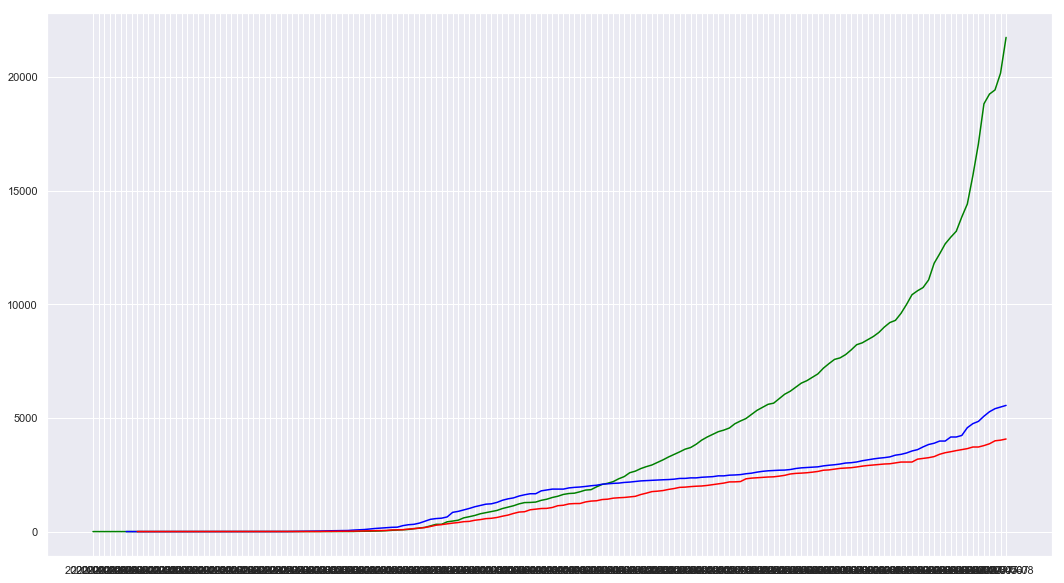

In [182]:
santa_clara = zip_to_data(94022)['data']
san_francisco = zip_to_data(94114)['data']
orange_county = zip_to_data(92646)['data']
tulsa = zip_to_data(74133)['data']


plt.figure(figsize=(18, 10))
plt.plot(orange_county['date'], orange_county['cases'], color='green')
plt.plot(santa_clara['date'], santa_clara['cases'], color='blue')
plt.plot(san_francisco['date'], san_francisco['cases'], color='red')
plt.show()